<a href="https://colab.research.google.com/github/MYon003/Myon/blob/main/Projects/Crate_and_Barrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Unzip the test and train data.

!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [257]:
# Getting the train and test values into dataframes.

import pandas as pd

train = pd.read_csv("train.csv", index_col = 0)
test = pd.read_csv("test.csv", index_col = 0)

train[:5]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [258]:
# Keeping the 'target' column as a single column.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['target'] = le.fit_transform(train['target'])
train['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [259]:
# Seperating the labels from the features set.
labels = train['target']
features = train.drop('target', axis = 1)
labels

id
1        0
2        0
3        0
4        0
5        0
        ..
61874    8
61875    8
61876    8
61877    8
61878    8
Name: target, Length: 61878, dtype: int64

In [260]:
# Figureing out the shape of the data.
features.shape

(61878, 93)

In [261]:
# Encode the labels of the train set(There are no labels for the test set)

from keras.utils import to_categorical

labels = to_categorical(labels)
labels[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [267]:
# Split the data into sets.

from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, labels, random_state=48, train_size = .85)

In [268]:
# Creating the model and compiling it.

from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Flatten(input_shape=(93,)))

model.add(layers.Dense(512, activation='relu', input_shape=(93,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 93)                0         
                                                                 
 dense_52 (Dense)            (None, 512)               48128     
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dense_55 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 213,513
Trainable params: 213,513
Non-trainable params: 0
_________________________________________________________________


In [269]:
# Fitting the model and keeping the history to view on a chart.

history = model.fit(features_train, label_train, epochs=50, steps_per_epoch=100, validation_split=0.1, validation_steps=50)

Epoch 1/50
100/100 [==============================] - 3s 26ms/step - loss: 0.7824 - accuracy: 0.7226 - val_loss: 0.6012 - val_accuracy: 0.7736
Epoch 2/50
100/100 [==============================] - 3s 26ms/step - loss: 0.6007 - accuracy: 0.7695 - val_loss: 0.5573 - val_accuracy: 0.7933
Epoch 3/50
100/100 [==============================] - 2s 23ms/step - loss: 0.5453 - accuracy: 0.7843 - val_loss: 0.5233 - val_accuracy: 0.8006
Epoch 4/50
100/100 [==============================] - 2s 23ms/step - loss: 0.5077 - accuracy: 0.7993 - val_loss: 0.5183 - val_accuracy: 0.8063
Epoch 5/50
100/100 [==============================] - 2s 21ms/step - loss: 0.4736 - accuracy: 0.8103 - val_loss: 0.4922 - val_accuracy: 0.8086
Epoch 6/50
100/100 [==============================] - 3s 26ms/step - loss: 0.4478 - accuracy: 0.8190 - val_loss: 0.5050 - val_accuracy: 0.8097
Epoch 7/50
100/100 [==============================] - 4s 37ms/step - loss: 0.4240 - accuracy: 0.8279 - val_loss: 0.5058 - val_accuracy: 0.8082

In [270]:
# Checking the accuracy with the training test sets.

test_loss, test_acc = model.evaluate(features_test, label_test)
print('test_acc:', test_acc)

291/291 [==============================] - 1s 4ms/step - loss: 1.5073 - accuracy: 0.7861
test_acc: 0.7861452102661133


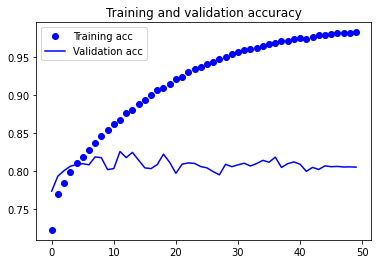

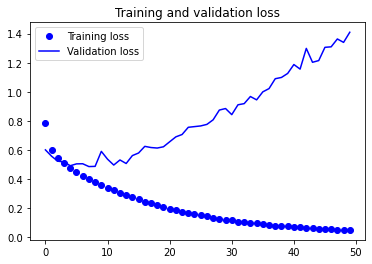

In [271]:
# Viewing the accuracy from the training.

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [272]:
# Getting the predictions from the test data.

predictions = model.predict(test)
predictions[1]

4512/4512 [==============================] - 20s 4ms/step


array([0.0000000e+00, 2.6624034e-29, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 2.0610513e-09,
       1.3684475e-26], dtype=float32)

In [273]:
# Making the column names.

columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9']

In [274]:
# Getting the id column.

id = pd.read_csv("test.csv")

In [275]:
# Combining the id column with the predictions.

pred = pd.DataFrame(predictions, columns = columns)
pred = pd.concat([id['id'], pred], axis=1)
pred

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1.978191e-11,8.797040e-05,1.146651e-01,8.852468e-01,7.933507e-18,3.409733e-14,1.092840e-08,7.685568e-13,2.909015e-14
1,2,0.000000e+00,2.662403e-29,0.000000e+00,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,2.061051e-09,1.368447e-26
2,3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,0.000000e+00
3,4,2.323509e-09,5.915049e-02,9.407065e-01,1.430331e-04,1.661590e-19,2.295297e-16,5.200034e-15,4.072448e-11,4.318633e-15
4,5,1.601367e-02,9.319826e-15,0.000000e+00,7.900515e-33,6.850447e-36,2.437620e-23,2.043263e-35,5.457855e-16,9.839864e-01
...,...,...,...,...,...,...,...,...,...,...
144363,144364,1.873182e-06,1.771459e-12,6.861569e-14,3.115561e-12,2.256520e-18,9.999979e-01,1.167086e-19,8.722854e-08,2.459384e-09
144364,144365,1.589547e-05,9.777938e-02,8.985240e-01,3.440583e-03,9.720600e-10,6.607959e-09,2.401829e-04,1.184774e-08,9.333328e-11
144365,144366,3.547744e-14,9.999121e-01,8.779393e-05,3.766881e-09,1.030148e-20,2.928652e-16,1.956824e-13,6.603204e-13,5.811903e-12
144366,144367,8.650592e-13,2.594698e-05,1.087858e-06,9.999729e-01,6.880357e-11,4.183641e-09,1.078958e-08,6.592114e-10,8.768469e-13


In [276]:
# Getting rid of the automatic index of the dataframe and turning it into a csv.

pred.to_csv("Submission", index=False)

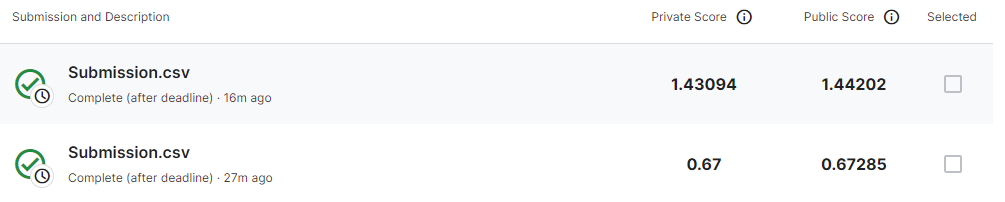

These are the scores i got from the submissions on Kaggle